##
Arthor: Anurag Gupta 

Email Id: anuragsgupta9211@gmail.com

FIIT04 Computer Vision Batch

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
# %matplotlib inline
import PIL.Image as images
from skimage import io
import cv2 as cv

### Histogram Equalisation

(array([ 457.,  978.,  852., 1263.,  872., 1038., 1186.,    0., 1367.,
        1629.,    0., 1794.,    0., 2079.,    0., 2170.,    0., 2264.,
           0.,    0., 2334.,    0., 2364.,    0., 2301.,    0., 2197.,
           0.,    0., 2162., 1902.,    0., 1863.,    0., 1668., 1509.,
           0., 1438., 1267., 1136., 1122., 1168., 1098., 1095., 1094.,
        1093.,    0., 1097., 1117., 1109., 1061., 1114., 1092., 1126.,
        1125., 1075., 1063., 1174., 1177.,    0., 1214., 1319., 1363.,
           0., 1398., 1505.,    0., 1737.,    0., 1868.,    0., 2451.,
           0., 2320.,    0., 2327.,    0.,    0., 2466.,    0., 2229.,
           0., 2272.,    0., 1843.,    0., 1736., 1707.,    0., 1655.,
           0., 1590., 1647.,    0., 1488., 1555.,    0., 1559., 1615.,
           0., 1601., 1432.,    0., 1539., 1728.,    0., 1630.,    0.,
        1724., 1889.,    0., 2094.,    0.,    0., 2144.,    0., 2360.,
           0., 2586.,    0.,    0., 2539.,    0., 2369.,    0.,    0.,
      

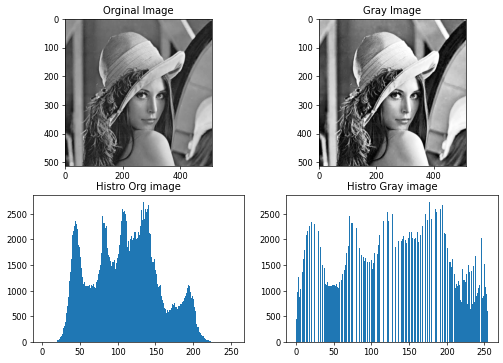

In [37]:
image_path = './images/lenna.png'
gaussian_image = io.imread(image_path)

# Convert the image to grayscale using OpenCV
gray_lena_image = cv.cvtColor(gaussian_image, cv.COLOR_BGR2GRAY)

# Ensure the grayscale image is of data type np.uint8
gray_lena_image = gray_lena_image.astype(np.uint8)

hist_equalis_img = cv.equalizeHist(gray_lena_image)

fig = plt.figure(figsize=(10,7))

fig.add_subplot(2,2,1)
plt.imshow(gray_lena_image,cmap=plt.get_cmap('gray'))
plt.title("Orginal Image")

fig.add_subplot(2,2,2)
plt.title("Gray Image")
plt.imshow(hist_equalis_img,cmap='gray')

fig.add_subplot(2,2,3)
plt.title("Histro Org image")
plt.hist(gray_lena_image.ravel(),bins=256,range=[0,255])


fig.add_subplot(2,2,4)
plt.title("Histro Gray image")
plt.hist(hist_equalis_img.ravel(),bins=256,range=[0,255])

# plt.imshow(np.hstack([gray_image,hist_equalis]))

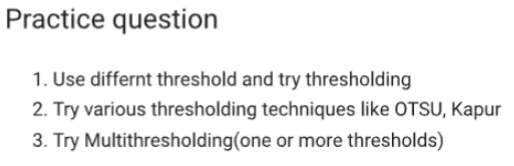

### 1. Use differnt threshold and try thresholding

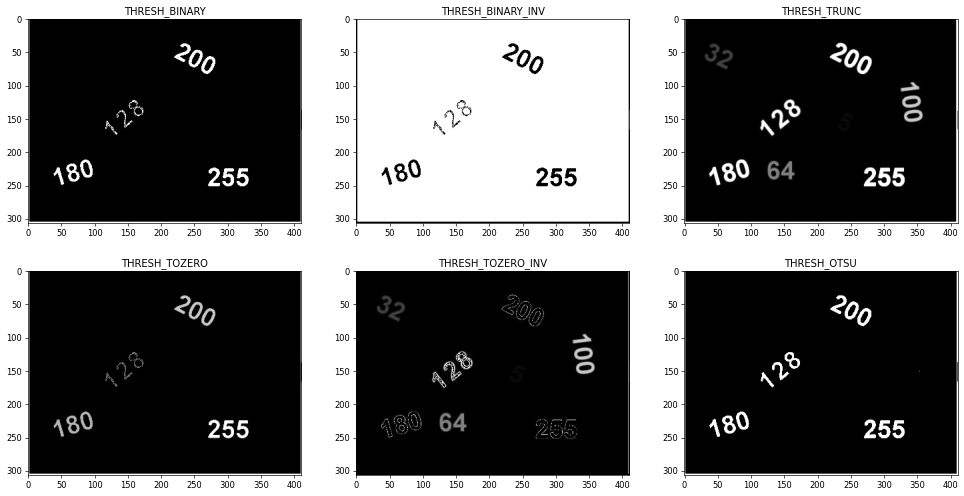

In [38]:
image_path = './images/ostuExample.png'
gaussian_image = cv.imread(image_path)

# Convert the image to grayscale using OpenCV
gray_image = cv.cvtColor(gaussian_image, cv.COLOR_BGR2GRAY)

# Ensure the grayscale image is of data type np.uint8
# gray_image = gray_image.astype(np.uint8)
ret, thresh1 = cv.threshold(gray_image, 127,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(gray_image, 127,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(gray_image, 127,255,cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(gray_image, 127,255,cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(gray_image, 127,255,cv.THRESH_TOZERO_INV)
ret, threshOstu = cv.threshold(gray_image, 127,255,cv.THRESH_OTSU)
# ret, thresh5 = cv.threshold(gray_image, 127,255,cv.)


# plt.imshow(np.hstack([gray_image,thresh1]))
fig = plt.figure(figsize=(20,10))
col, row = 2,3
fig.add_subplot(col,row,1)

plt.imshow(thresh1,cmap='gray')
plt.title("THRESH_BINARY")

fig.add_subplot(col,row,2)
plt.title("THRESH_BINARY_INV")
plt.imshow(thresh2,cmap='gray')

fig.add_subplot(col,row,3)
plt.title("THRESH_TRUNC")
plt.imshow(thresh3,cmap='gray')
fig.add_subplot(col,row,4)
plt.title("THRESH_TOZERO")
plt.imshow(thresh4,cmap='gray')
fig.add_subplot(col,row,5)
plt.title("THRESH_TOZERO_INV")
plt.imshow(thresh5,cmap='gray')
fig.add_subplot(col,row,6)
plt.title("THRESH_OTSU")
plt.imshow(threshOstu,cmap='gray')


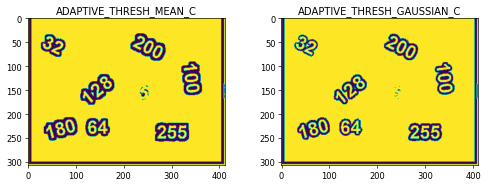

In [39]:
adaptive_thresh1 = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_MEAN_C,
                                        cv.THRESH_BINARY,11,2)
adaptive_thresh2 = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv.THRESH_BINARY,11,2)

fig =plt.figure(figsize=(10,7))
fig.add_subplot(2,2,1)
plt.title("ADAPTIVE_THRESH_MEAN_C")
plt.imshow(adaptive_thresh1)

fig.add_subplot(2,2,2)
plt.title("ADAPTIVE_THRESH_GAUSSIAN_C")
plt.imshow(adaptive_thresh2)

### Apply Otsu's thresholding

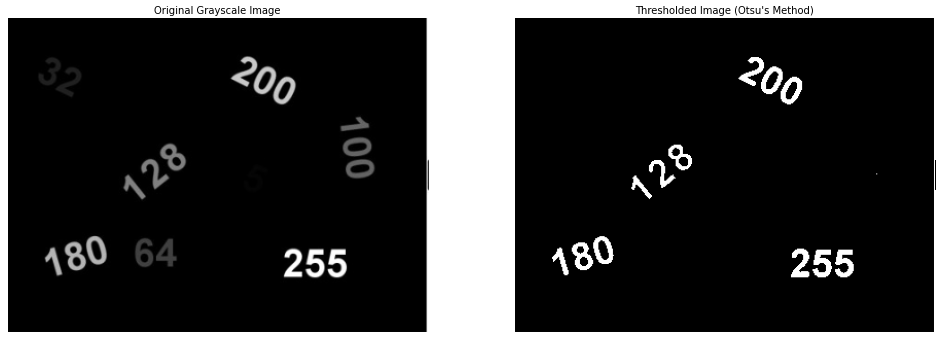

In [40]:

image_path = './images/ostuExample.png'
ostu_image = cv.imread(image_path)

# Convert the image to grayscale using OpenCV
ostu_image = cv.cvtColor(ostu_image, cv.COLOR_BGR2GRAY)

rest, thresholded_image = cv.threshold(ostu_image, 127, 255,cv.THRESH_OTSU)

# Create a figure with the specified size
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Display the original grayscale image
ax[0].imshow(ostu_image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off')  # Hide axis

# Display the thresholded image using Otsu's method
ax[1].imshow(thresholded_image, cmap='gray')
ax[1].set_title("Thresholded Image (Otsu's Method)")
ax[1].axis('off')  # Hide axis

# Show the plot
plt.show()


### Try MultiThresholding (one or more thresholds)

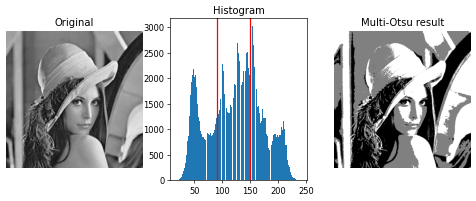

In [41]:
from skimage.filters import threshold_multiotsu


image = cv.imread('./images/lenna.png',0)

thresholds = threshold_multiotsu(image)


regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

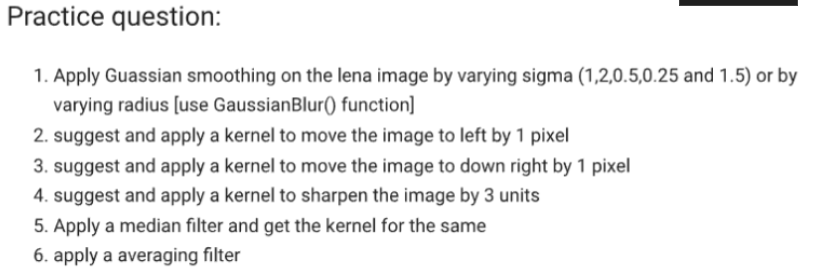

In [42]:
kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
kernel_sharpening_2 = np.array([[-1,-1,-1],[-1,10,-1],[-1,-1,-1]])
# kernel_sharpening_3 = np.array([[-3,-3,-3],[-3,10,-3],[-3,-3,-3]])
kernel_sharpening_3 = np.array([[3,3,3],[3,-10,3],[3,3,3]])

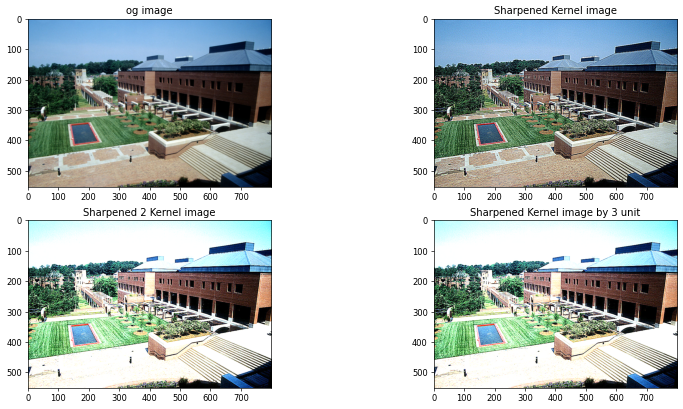

In [43]:
fig, ax = plt.subplots(2,2,figsize=(16,8))
# fig.tight_layout()
school_img = cv.imread('./images/school.jpg')
# school_img,_,m= getImage('./images/school.jpg')
ax[0][0].imshow(cv.cvtColor(school_img,cv.COLOR_BGR2RGB))
ax[0][0].set_title('og image')

sharpened = cv.filter2D(school_img,-1,kernel_sharpening)
sharpened2 = cv.filter2D(school_img,-1,kernel_sharpening_2)

ax[0][1].set_title('Sharpened Kernel image')
ax[0][1].imshow(cv.cvtColor(sharpened,cv.COLOR_BGR2RGB))

ax[1][0].set_title('Sharpened 2 Kernel image')
ax[1][0].imshow(cv.cvtColor(sharpened2,cv.COLOR_BGR2RGB))
ax[1][1].set_title('Sharpened Kernel image by 3 unit')
ax[1][1].imshow(cv.cvtColor(sharpened2,cv.COLOR_BGR2RGB))
# plt.show()

### Pratice Question:
Apply Guassian smoothing on the lena image by varying sigma (1,2,0.5,0.25 and 1.5) or by
varying radius [use GaussianBlur() function]

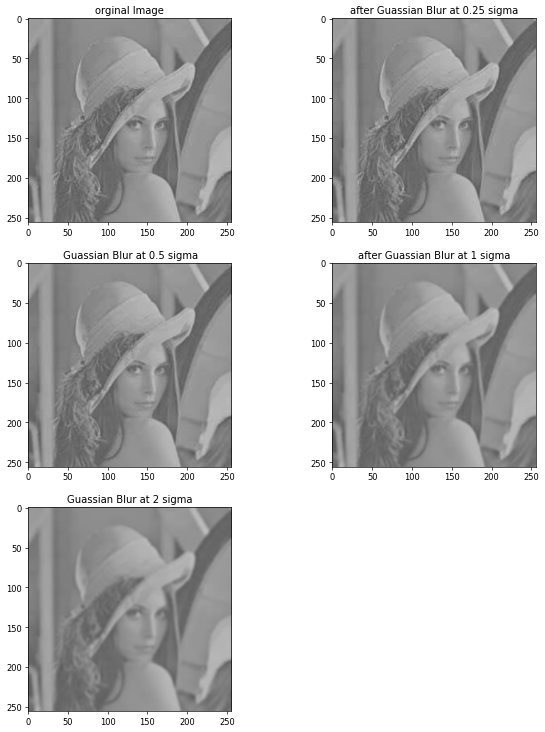

In [44]:
low_img_np= cv.imread('./images/low.jpeg')
gaussian_image = cv.GaussianBlur(low_img_np, (5, 5), 1)
# 1,2,0.5,0.25
fig = plt.figure(figsize=(12,15))
# fig.tight_layout()
col = 2
row = 3

fig.add_subplot(row,col,1)
plt.imshow(low_img_np)
plt.title("orginal Image")


fig.add_subplot(row,col,2)
plt.title("after Guassian Blur at 0.25 sigma")
plt.imshow(cv.GaussianBlur(low_img_np, (5, 5), 0.25))

fig.add_subplot(row,col,3)
plt.title(" Guassian Blur at 0.5 sigma")
plt.imshow(cv.GaussianBlur(low_img_np, (5, 5), 0.5))

fig.add_subplot(row,col,4)
plt.title("after Guassian Blur at 1 sigma")
plt.imshow(cv.GaussianBlur(low_img_np, (5, 5), 1))

fig.add_subplot(row,col,5)
plt.title("Guassian Blur at 2 sigma")
plt.imshow(cv.GaussianBlur(low_img_np, (5, 5), 2))


#### Pratice Question 2,3,4,5,6:

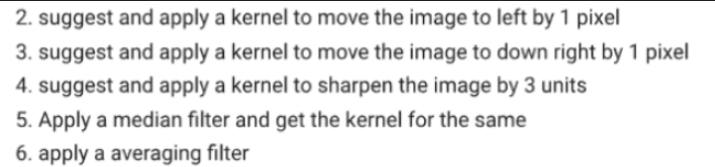

In [45]:
left, right, up, down = 1,1,1,1
# left, right, up, down = 2,2,2,2
# left, right, up, down = 3,3,3,3
# left, right, up, down = 5,5,5,5
depth = -1

school_img = plt.imread('./images/rose1.jpg',0)

left_shift_kernel = np.array([[0,0,0],
                     [0,0,left],
                     [0,0,0]]
)
right_shift_kernel = np.array([[0,0,0],
                      [right,0,0],
                      [0,0,0]])

up_shift_kernel = np.array([[0,up,0],
                   [0,0,0],
                   [0,0,0]])

down_shift_kernel = np.array([[0,0,0], 
                     [0,0,0],
                     [0,down,0]])

down_left_shift_kernel = np.array([[0,0,0],
                          [0,0,left],
                          [0,down,0]])

blur_kernel = np.array(  [[0.111,0.111,0.111],
                          [0.111,0.111,0.111],
                          [0.111,0.111,0.111]])
sigma = 8
gaussian_blur_kernel = np.array(  [[sigma+1/16,sigma+2/16,sigma+1/16],
                          [sigma+2/16,sigma+4/16,sigma+2/16],
                          [sigma+1/16,sigma+2/16,sigma+1/16]])


left_shift_img = cv.filter2D(school_img,depth,left_shift_kernel)
right_shift_img = cv.filter2D(school_img,depth,right_shift_kernel)
up_shift_img = cv.filter2D(school_img,depth,up_shift_kernel)
down_shift_img = cv.filter2D(school_img,depth,down_shift_kernel)
down_left_shift_img = cv.filter2D(school_img,depth,down_left_shift_kernel)

blur_kernel_img = cv.filter2D(school_img,depth,blur_kernel)
gaussian_blur_kernel_img = cv.filter2D(school_img,depth,blur_kernel)

Text(0.5, 1.0, 'GaussianBlur ')

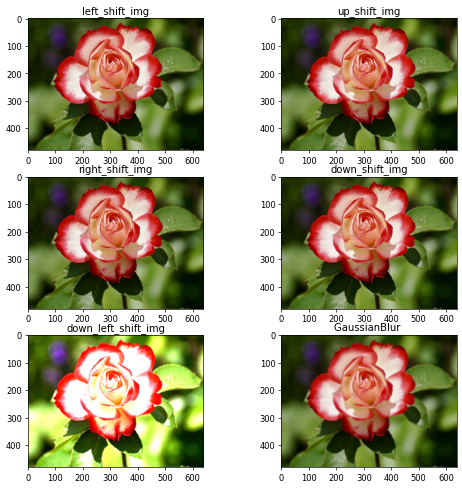

In [46]:
fig = plt.figure(figsize=(10,20))
fig.tight_layout()
row = 6
col = 2

fig.add_subplot(row,col,1)
plt.imshow(left_shift_img)
plt.title("left_shift_img")

fig.add_subplot(row,col,2)
plt.imshow(up_shift_img)
plt.title("up_shift_img")

fig.add_subplot(row,col,3)
plt.imshow(right_shift_img)
plt.title("right_shift_img")


fig.add_subplot(row,col,4)
plt.imshow(down_shift_img)
plt.title("down_shift_img")


fig.add_subplot(row,col,5)
plt.imshow(down_left_shift_img)
plt.title("down_left_shift_img")
gaussian_image = cv.GaussianBlur(school_img, (5, 5), 8)
fig.add_subplot(row,col,6)
plt.imshow(gaussian_image,cmap="gray")
plt.title("GaussianBlur ")



Text(0.5, 1.0, 'gaussian with kernel')

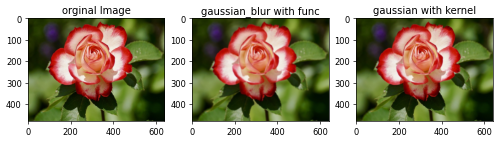

In [47]:

fig = plt.figure(figsize=(10,7))
fig.tight_layout()
row = 1
col = 3
og_gaussian_image = school_img
gaussian_image = cv.GaussianBlur(og_gaussian_image, (5, 5), 8)
fig.add_subplot(row,col,1)
plt.imshow(og_gaussian_image)
plt.title("orginal Image")
fig.add_subplot(row,col,2)
plt.imshow(gaussian_image)
plt.title("gaussian_blur with func")

fig.add_subplot(row,col,3)
plt.imshow(gaussian_blur_kernel_img)
plt.title("gaussian with kernel")

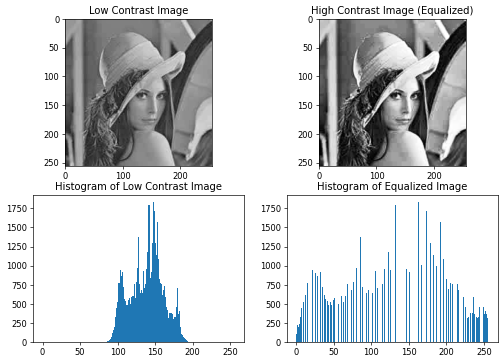

In [48]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the low-contrast image
low_contrast_img_path = './images/low.jpeg'
low_contrast_img = plt.imread(low_contrast_img_path, 0)

# Convert the image to NumPy array and data type int
low_contrast_img = cv.cvtColor(low_contrast_img, cv.COLOR_RGB2GRAY)
low_contrast_img = np.array(low_contrast_img)
# low_contrast_img = low_contrast_img.astype(np.uint8)

# Perform histogram equalization on the low-contrast image
equalized_img = cv.equalizeHist(low_contrast_img)

# Create a figure with the specified size
fig = plt.figure(figsize=(10, 7))

# Plot the original low-contrast image
fig.add_subplot(2, 2, 1)
plt.imshow(low_contrast_img, cmap='gray')
plt.title("Low Contrast Image")

# Plot the equalized high-contrast image
fig.add_subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title("High Contrast Image (Equalized)")

# Plot the histogram of the low-contrast image
fig.add_subplot(2, 2, 3)
plt.hist(low_contrast_img.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Low Contrast Image")

# Plot the histogram of the equalized image
fig.add_subplot(2, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Equalized Image")

# Display the plots
plt.show()



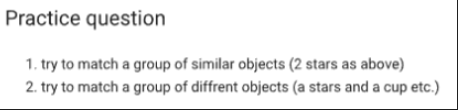

Text(0.5, 1.0, 'arrow Template Image')

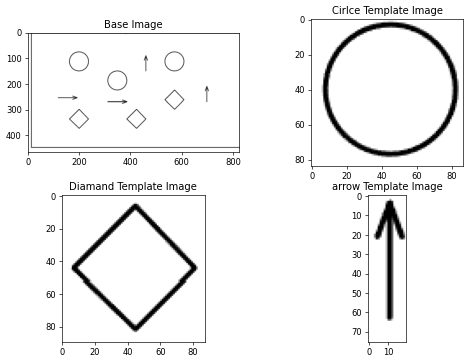

In [49]:
fig = plt.figure(figsize=(10,7))

baseImg = cv.imread('./images/baseImage.png')
baseImg = cv.cvtColor(baseImg,cv.COLOR_BGR2GRAY)
circleTemplate = cv.imread('./images/circleTemplate.png')

cirlceTemplate = cv.cvtColor(circleTemplate, cv.COLOR_BGR2GRAY)

diamandTemplate = cv.imread('./images/diamandTemplate.png')

diamandTemplate = cv.cvtColor(diamandTemplate, cv.COLOR_BGR2GRAY)

arrowTemplate = cv.imread('./images/arrowTemplate.png')
arrowTemplate = cv.cvtColor(arrowTemplate, cv.COLOR_BGR2GRAY)

fig.add_subplot(2,2,1)
plt.imshow(baseImg,cmap='gray')
plt.title("Base Image")

fig.add_subplot(2,2,2)
plt.imshow(cirlceTemplate,cmap='gray')
plt.title("Cirlce Template Image")

fig.add_subplot(2,2,3)
plt.imshow(diamandTemplate,cmap='gray')
plt.title("Diamand Template Image")

fig.add_subplot(2,2,4)
plt.imshow(arrowTemplate,cmap='gray')
plt.title("arrow Template Image")

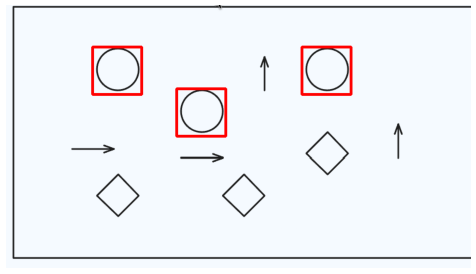

In [50]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img_rgb = cv.imread('./images/baseImage.png')

img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('./images/circleTemplate.png', cv.IMREAD_GRAYSCALE)
template2 = cv.imread('./images//diamandTemplate.png', cv.IMREAD_GRAYSCALE)

w, h = template.shape[::-1]
 
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
 cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
 


result_image_path = './res.png'

# Save the annotated source image as an image file
cv.imwrite(result_image_path, img_rgb)

# Display the resulting image
result_image = plt.imread(result_image_path)
plt.imshow(result_image)
plt.axis('off')  # Hide the axes for better visualization
plt.show()

### Multi template matching with different object

In [51]:
import MTM,os
from MTM import matchTemplates

listTemplate = []

image_folder = "./templates/"
for filename in os.listdir(image_folder):
    template_img = cv.imread(os.path.join(image_folder, filename))
    template_img = cv.cvtColor(template_img, cv.COLOR_BGR2GRAY)
    listTemplate.append((filename.split('.')[0], template_img))
    
hits = matchTemplates(listTemplate,
                      baseImg,
                      score_threshold=0.9,
                      searchBox=(0, 0, 3000, 750),
                      method=cv.TM_CCOEFF_NORMED,
                      maxOverlap=0.1)

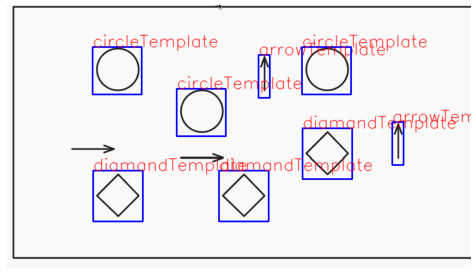

In [52]:
import matplotlib.pyplot as plt
from MTM import drawBoxesOnRGB
overlay = drawBoxesOnRGB(baseImg,
                         hits,
                         showLabel = True,
                         labelColor=(255, 0, 0),
                         boxColor = (0, 0, 255),
                         labelScale=1,
                         boxThickness = 2)
                                           
plt.imshow(overlay)
plt.axis('off')
plt.show()

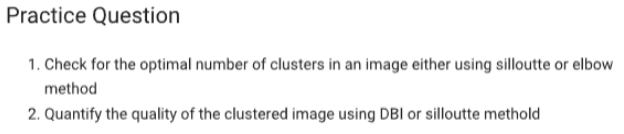

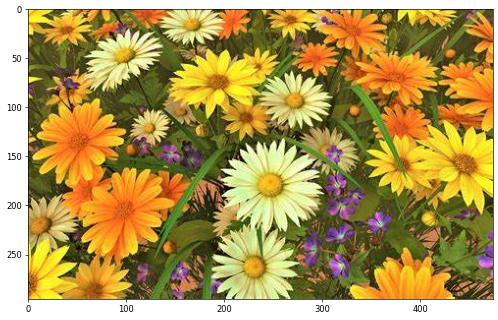

In [53]:
img = plt.imread('./images/sunflower.jpeg')
img_np = np.array(img)
img_np = img_np.astype('int')
plt.imshow(img_np,cmap='gray')

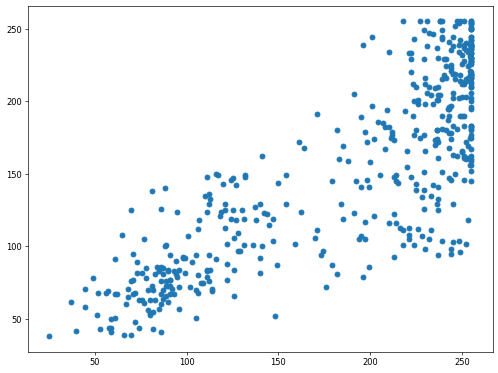

In [54]:
x,y = img_np[:2]

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':60})
plt.scatter(x[:, 0], x[:, 1])

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
Cluster = KMeans(n_clusters=5)
Cluster.fit(x)
y_pred = Cluster.predict(x)

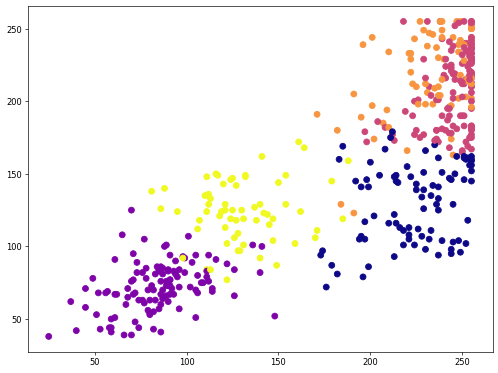

In [56]:
plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=50, cmap='plasma')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':60})

### Elbow Method

<Axes: title={'center': 'ELBOW METHOD'}>

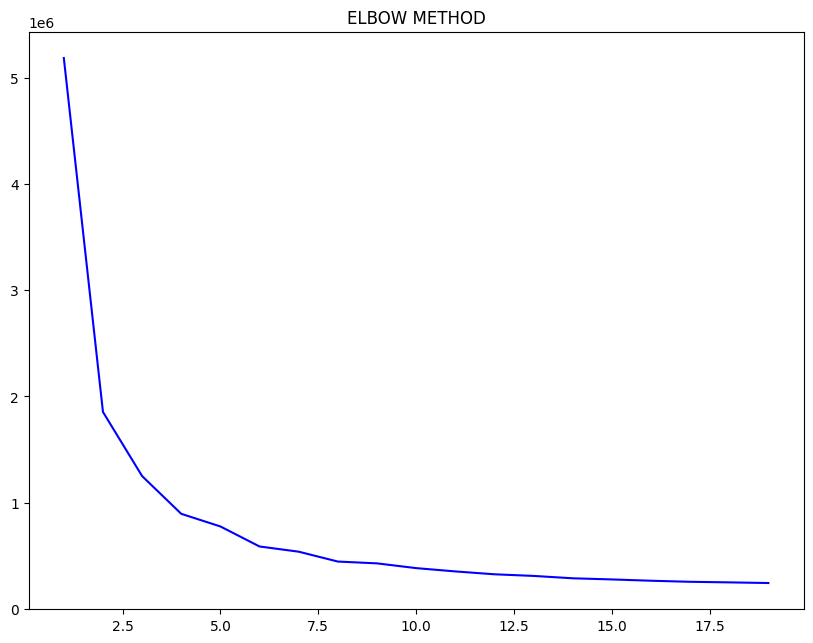

In [57]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Array to store inertia values (sum of squared distances)
elbow = []

# Calculate inertia for different numbers of clusters
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)

# Plot the elbow method using Seaborn's lineplot
plt.figure(figsize=(10, 7.5), dpi=100)
plt.title('ELBOW METHOD')
sns.lineplot(x=range(1, 20), y=elbow, color='blue')
# plt.show()


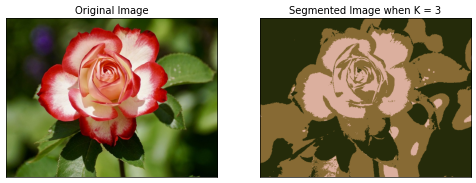

In [58]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

og_img = cv2.imread("./images/rose1.jpg")
img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)

img=cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


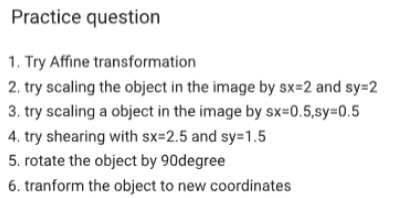

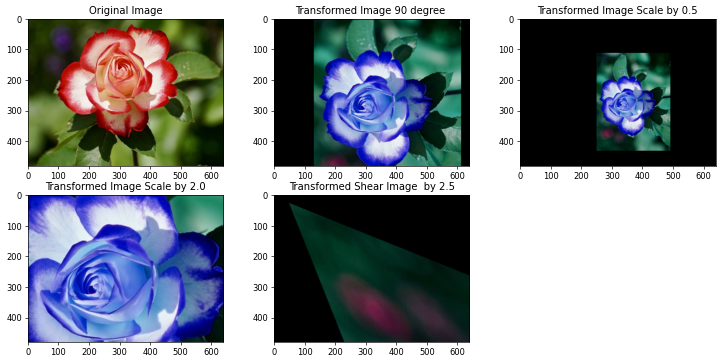

In [59]:
img = cv.imread('./images/rose1.jpg')


rows, cols = img.shape[:2]

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
center = (cols // 2, rows // 2)
angle = 90  # Rotate by 45 degrees
tx, ty = 50, 30  # Translate by 50 units in x and 30 units in y

scale = 2

rotation_matrix = cv.getRotationMatrix2D(center, angle, 0.5)
rotation_matrix_o = cv.getRotationMatrix2D(center, angle, 1)
rotation_matrix_s = cv.getRotationMatrix2D(center, angle, scale)

rotation_matrix[0, 2] += tx
rotation_matrix[1, 2] += ty

rotation_matrix_o[0, 2] += tx
rotation_matrix_o[1, 2] += ty

rotation_matrix_s[0, 2] += tx
rotation_matrix_s[1, 2] += ty

transformed_img = cv.warpAffine(img, rotation_matrix_o, (cols, rows))
transformed_img1 = cv.warpAffine(img, rotation_matrix, (cols, rows))
transformed_img2 = cv.warpAffine(img, rotation_matrix_s, (cols, rows))


sx = 2.5
sy = 2.5
shear_matrix = np.array([
[1, sx, tx],
[sy, 1, ty]
], dtype=float)
# Apply the affine transformation using the shearing matrix
transformed_img_shear = cv.warpAffine(img, shear_matrix, (cols, rows))
# Apply the affine transformation

# Display the original and transformed images using matplotlib
plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(transformed_img)
plt.title('Transformed Image 90 degree ')
plt.subplot(2, 3, 3)
plt.imshow(transformed_img1)
plt.title('Transformed Image Scale by 0.5')
plt.subplot(2, 3, 4)
plt.imshow(transformed_img2)
plt.title('Transformed Image Scale by 2.0')
plt.subplot(2, 3, 5)
plt.imshow(transformed_img_shear)
plt.title('Transformed Shear Image  by 2.5')

plt.show()
